<a href="https://colab.research.google.com/github/mdietterle/TrabalhosMachineLearningPos/blob/main/Aula4_NB_Restaurant_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercício de fixação XI / Desafio V - Naive Bayes e fundamentos de PLN (Processamento de Linguagem Natural) com Python

Nesta demo utilizaremos o Naive Bayes para criar um modelo para o clássico problema de análise de sentimento em linguagem escrita.

In [1]:
# Importando nossas bibliotecas

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  print('Usuario fez upload do arquivo "{name}" de tamanho {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Restaurant_Reviews.tsv to Restaurant_Reviews.tsv
Usuario fez upload do arquivo "Restaurant_Reviews.tsv" de tamanho 61332 bytes


In [3]:
# Importando nosso dataset

df = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t')
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [4]:
df['lenght'] = df['Review'].apply(len)
df.head()

,Review,Liked,lenght
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


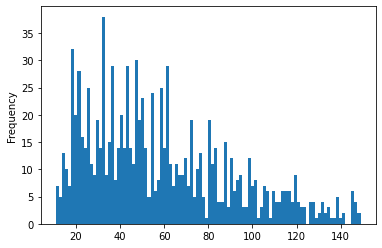

In [5]:
df['lenght'].plot(bins=100, kind='hist')

In [6]:
df.lenght.describe()

count    1000.000000
mean       58.315000
std        32.360052
min        11.000000
25%        33.000000
50%        51.000000
75%        80.000000
max       149.000000
Name: lenght, dtype: float64

In [7]:
df[df['lenght']==11]['Review'].iloc[0]

'DELICIOUS!!'

In [8]:
df[df['lenght']==149]['Review'].iloc[0]

'The problem I have is that they charge $11.99 for a sandwich that is no bigger than a Subway sub (which offers better and more amount of vegetables).'

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f49ac400c10>,
      dtype=object)

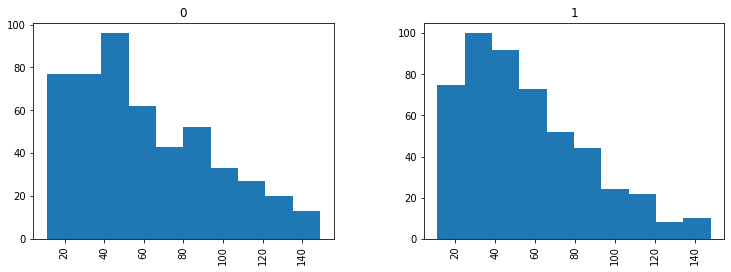

In [9]:
df.hist(column='lenght', by='Liked',figsize=(12,4))

In [10]:
# Limpando nossos textos

import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Stemming e Lemmatizing (Stemming - redução de palavras flexionadas / Lemmatizing - agrupando as formas flexionadas de uma palavra para que possam ser analisadas como um só item)

ps = nltk.stem.PorterStemmer()
lemma = nltk.stem.WordNetLemmatizer()
corpus = []

for i in range(0, 1000):
    review = re.sub('[^a-zA-Z]', ' ', df['Review'][i])
    review = review.lower()
    review = review.split()
    review = [lemma.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [11]:
# Criando BoW via TF-IDF (Bag of Words - Ref. https://machinelearningmastery.com/gentle-introduction-bag-words-model/)

from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(ngram_range=(1,2))

x = cv.fit_transform(corpus).toarray()
y = df.iloc[:, 1].values

In [12]:
# Ajuste de nosso Baive Bayes para os dados de treinamento

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [13]:
# Naive Bayes

from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train, y_train)

MultinomialNB()

In [14]:
# Predicao para dados de teste

from sklearn.metrics import accuracy_score

y_pred = mnb.predict(x_test)
accuracy1 = accuracy_score(y_test, y_pred)*100
print("Acuracia: {}".format(accuracy1))

Acuracia: 79.5


In [15]:
# Via Matriz de Confusão

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[76, 20],
       [21, 83]])

In [16]:
# Via Classification Report

from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.79      0.79        96
           1       0.81      0.80      0.80       104

    accuracy                           0.80       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.80      0.80      0.80       200



['wow loved place', 'crust good', 'tasty texture nasty', 'stopped late may bank holiday rick steve recommendation loved', 'selection menu great price', 'getting angry want damn pho', 'honeslty taste fresh', 'potato like rubber could tell made ahead time kept warmer', 'fry great', 'great touch', 'service prompt', 'would go back', 'cashier care ever say still ended wayyy overpriced', 'tried cape cod ravoli chicken cranberry mmmm', 'disgusted pretty sure human hair', 'shocked sign indicate cash', 'highly recommended', 'waitress little slow service', 'place worth time let alone vega', 'like', 'burrittos blah', 'food amazing', 'service also cute', 'could care le interior beautiful', 'performed', 'right red velvet cake ohhh stuff good', 'never brought salad asked', 'hole wall great mexican street taco friendly staff', 'took hour get food table restaurant food luke warm sever running around like totally overwhelmed', 'worst salmon sashimi', 'also combo like burger fry beer decent deal', 'like

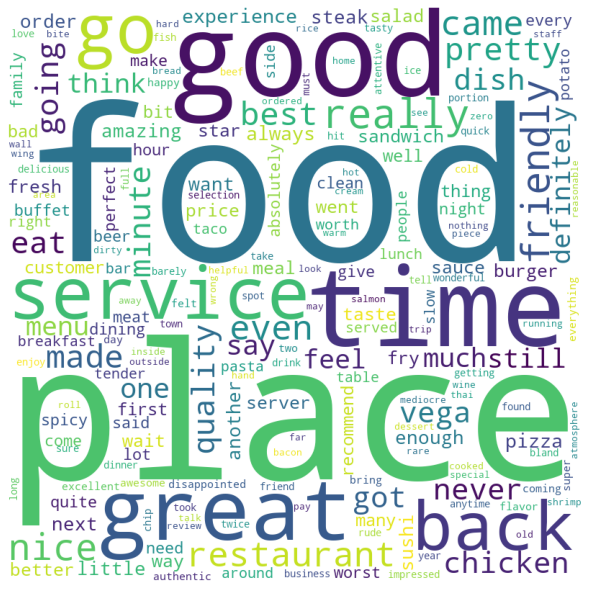

In [18]:
# Gerando nuvem de palavras global

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size= 12).generate("".join(corpus))
print(corpus)
plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

**[Desafio V]**

Nas células a seguir, tente construir nuvens de palavras para cada uma de nossas classes bem como execute as etapas para criação de modelo se utilizando de alg. KNN ou quaisquer outros de sua preferência.

     index                                             Review  Liked  lenght
0        0                           Wow... Loved this place.      1      24
1        3  Stopped by during the late May bank holiday of...      1      87
2        4  The selection on the menu was great and so wer...      1      59
3        8                          The fries were great too.      1      25
4        9                                     A great touch.      1      14
..     ...                                                ...    ...     ...
495    899                       Overall, a great experience.      1      28
496    901  Their regular toasted bread was equally satisf...      1      97
497    907  The chips and sals a here is amazing!!!!!!!!!!...      1      55
498    909              This is my new fav Vegas buffet spot.      1      37
499    922  Every time I eat here, I see caring teamwork t...      1      70

[500 rows x 4 columns]
['crust good', 'tasty texture nasty', 'getting angry

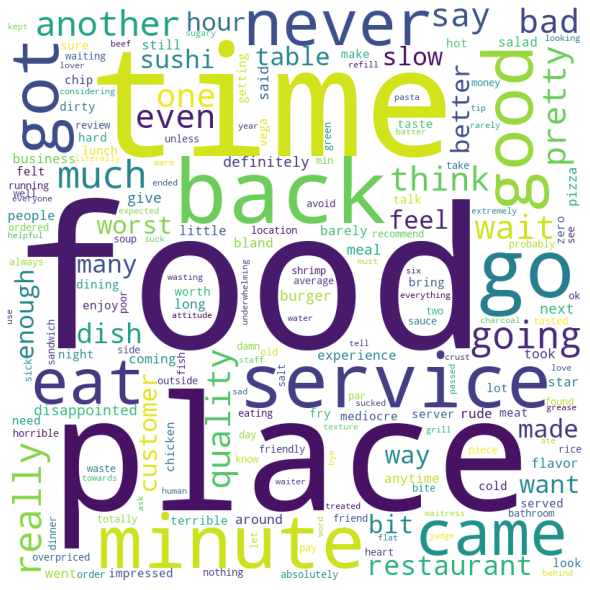

In [38]:
# Espaço para resolução de nossos desafios.

# Nuvem de palavras negativas

dfNegativo = df[df['Liked']==0]

dfn = dfNegativo.reset_index()

corpus = []

for i in range(0, len(dfn)):
    review = re.sub('[^a-zA-Z]', ' ', dfn['Review'][i])
    review = review.lower()
    review = review.split()
    review = [lemma.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size= 12).generate("".join(corpus))
print(corpus)
plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

['wow loved place', 'stopped late may bank holiday rick steve recommendation loved', 'selection menu great price', 'fry great', 'great touch', 'service prompt', 'tried cape cod ravoli chicken cranberry mmmm', 'highly recommended', 'food amazing', 'service also cute', 'could care le interior beautiful', 'performed', 'right red velvet cake ohhh stuff good', 'hole wall great mexican street taco friendly staff', 'also combo like burger fry beer decent deal', 'found place accident could happier', 'overall like place lot', 'redeeming quality restaurant inexpensive', 'ample portion good price', 'first visit hiro delight', 'shrimp tender moist', 'positive note server attentive provided great service', 'thing like prime rib dessert section', 'burger good beef cooked right', 'want sandwich go firehouse', 'side greek salad greek dressing tasty pita hummus refreshing', 'ordered duck rare pink tender inside nice char outside', 'came running u realized husband left sunglass table', 'chow mein good',

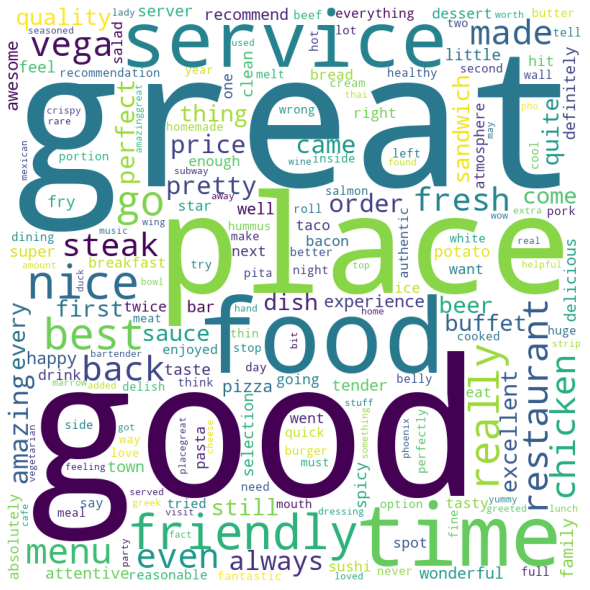

In [39]:
# Nuvem de palavras positivas

dfPositivo = df[df['Liked']==1]

dfp = dfPositivo.reset_index()

corpus = []

for i in range(0, len(dfp)):
    review = re.sub('[^a-zA-Z]', ' ', dfp['Review'][i])
    review = review.lower()
    review = review.split()
    review = [lemma.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size= 12).generate("".join(corpus))
print(corpus)
plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

## Implementação via KNN

Criação de um modelo utilizando o algoritmo KNN, e apresentando suas métricas.

In [48]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

In [49]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[82 14]
 [39 65]]
              precision    recall  f1-score   support

           0       0.68      0.85      0.76        96
           1       0.82      0.62      0.71       104

    accuracy                           0.73       200
   macro avg       0.75      0.74      0.73       200
weighted avg       0.75      0.73      0.73       200

